### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# pip install --upgrade seaborn

### Loading and understanding the dataset

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
# Check for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Exploratory Data Analysis

In [10]:
# Descriptive Statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Data Visualization

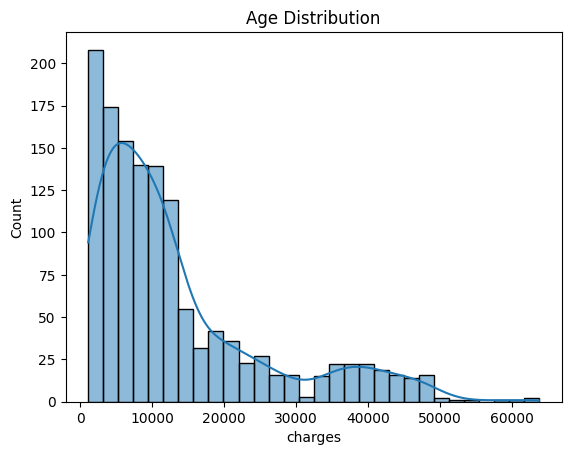

In [11]:
# Distribution of charges(Target)
sns.histplot(x=df['charges'],kde=True)
plt.title('Age Distribution')
plt.show()

Most of the medical expenses are below 20000, with negligible number of patients having medical expenses above 50000.

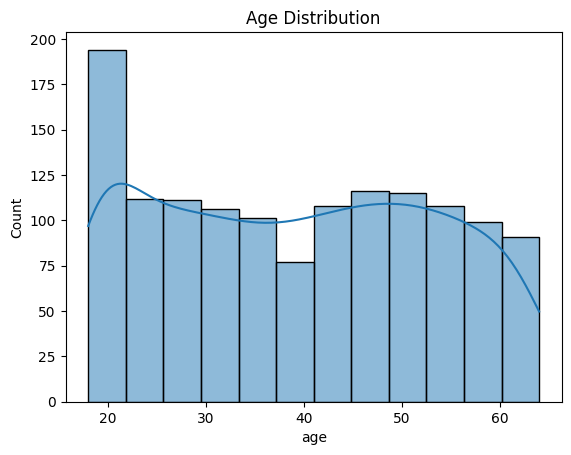

In [12]:
# Age distribution
sns.histplot(x=df['age'],kde=True)
plt.title('Age Distribution')
plt.show()

The patients' ages range from 20 to 60 years, indicating a diverse age group that spans early adulthood to late middle age.

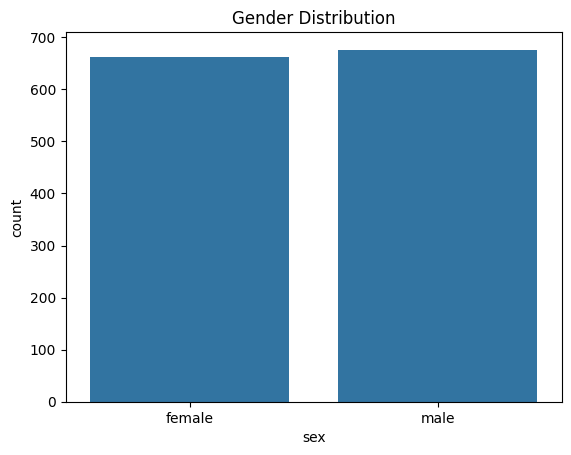

In [13]:
# Gender plot
sns.countplot(x=df['sex'])
plt.title('Gender Distribution')
plt.show()

It is clear that number of males and females are almost equal in the dataset.

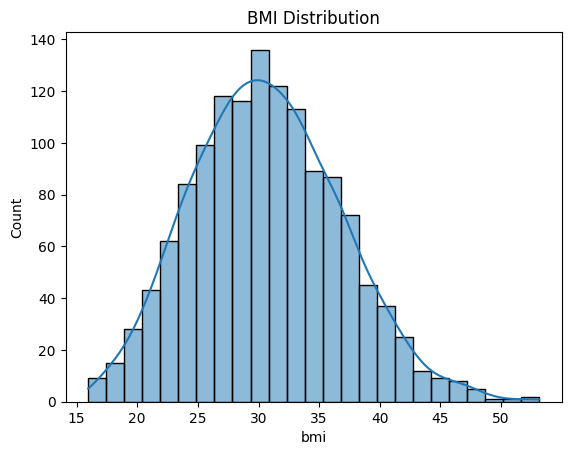

In [14]:
# BMI distribution
sns.histplot(x=df['bmi'],kde=True)
plt.title('BMI Distribution')
plt.show()

The majority of the patients have BMI between 25 and 40 which is considered as overweight and could be a major factor in increasing the medical cost.

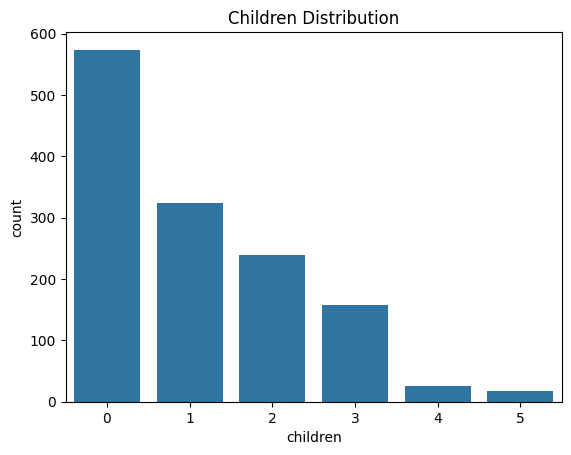

In [15]:
# Children count
sns.countplot(x=df['children'])
plt.title('Children Distribution')
plt.show()

The graph clearly shows that most of the patients have no children and very few patients have more than 3 children.

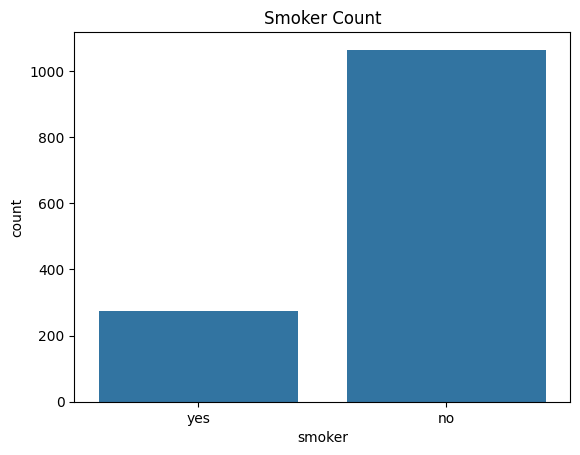

In [16]:
# Count of smokers
sns.countplot(x = df['smoker'])
plt.title('Smoker Count')
plt.show()

Smokers are very few in the dataset. Nearly 80% of the patients are non-smokers.

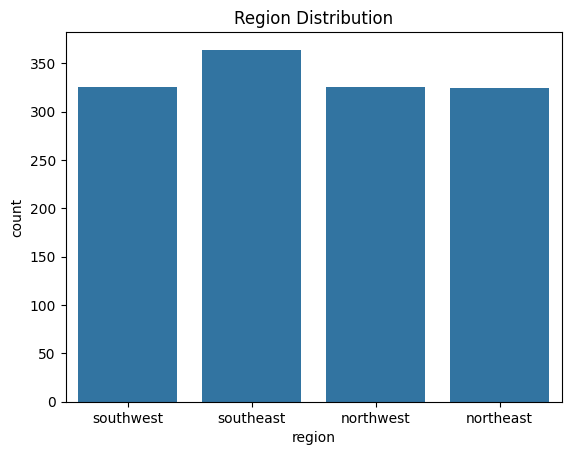

In [17]:
# Region wise plot
sns.countplot(x=df['region'])
plt.title('Region Distribution')
plt.show()

The count of patient from southeast is slighltly higher than the other regions, but the number of patients from other regions are almost equal.

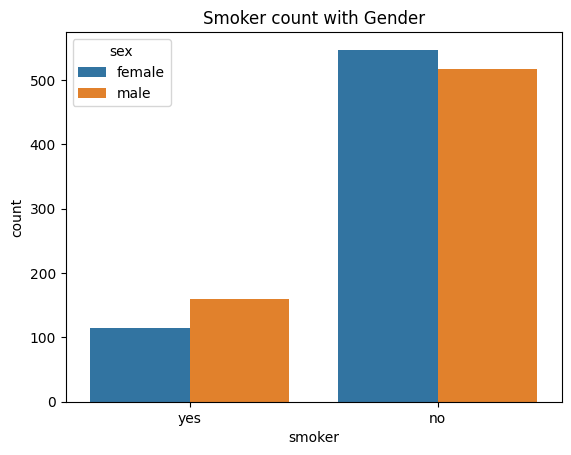

In [18]:
# Smokers count with respect to patient's gender
sns.countplot(x=df['smoker'],hue=df['sex'])
plt.title('Smoker count with Gender')
plt.show()

We can notice more male smokers than female smokers. So, medical treatment expense for males would be more than females, given the impact of smoking on the medical expenses.

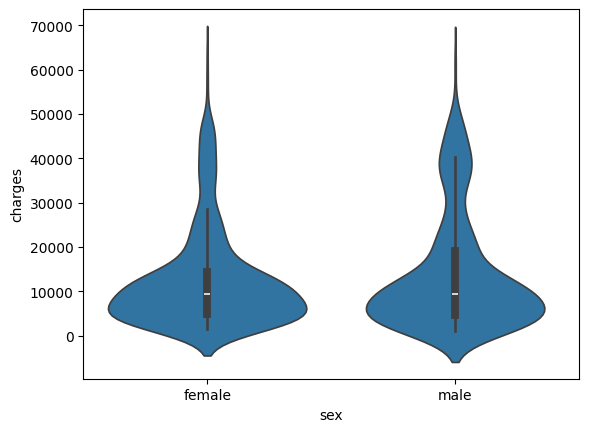

In [19]:
# Gender vs Charges
sns.violinplot(x=df['sex'],y=df['charges'])
plt.show()

The medical expenses do not differ between genders (male and female).

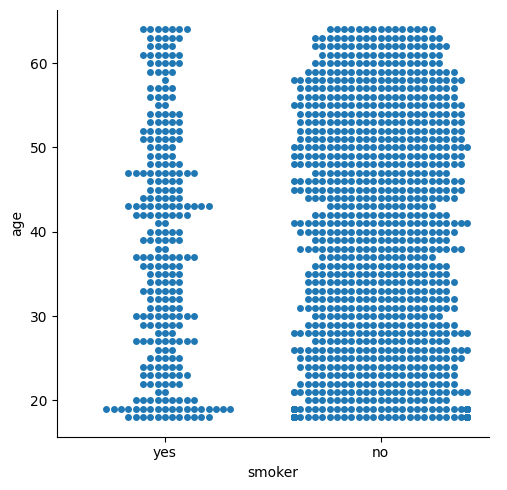

In [20]:
# Smokers and age distribution
sns.catplot(x=df['smoker'],y=df['age'],kind='swarm',data=df)
plt.show()

From the graph, we can see that there significant number of smokers of age 19. Lets check the medical expense of smokers of age 19.

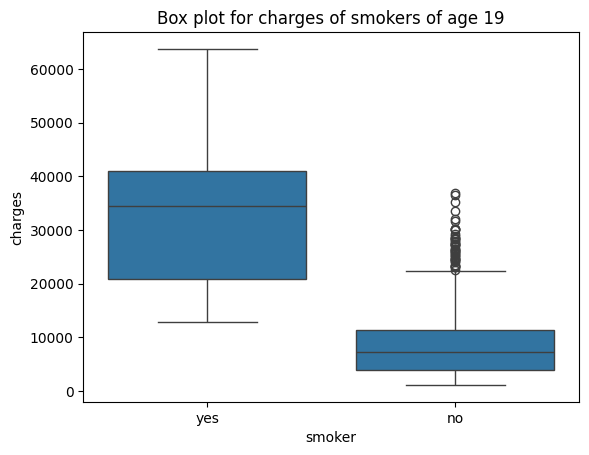

In [21]:
# Smokers of age 19
sns.boxplot(x=df['smoker'],y=df['charges'],data=df[(df['age']== 19)])
plt.title("Box plot for charges of smokers of age 19")
plt.show()

- Surprisingly the medical expense of smokers of age 19 is very high in comparison to non smokers. In non smokers we can see some outliers, which may be due to illness or accidents.
- It is clear that the medical expense of smokers is higher than that of non-smokers.

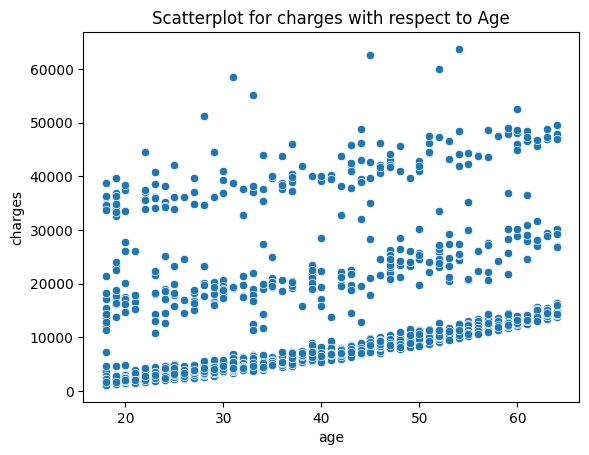

In [22]:
# Charges distribution with respect to age
sns.scatterplot(x=df['age'],y=df['charges'])
plt.title("Scatterplot for charges with respect to Age")
plt.show()

- Majority of the points shows that medical expense increases with age which may be due to the fact that older people are more prone to illness.
- But there are some outliers which shows that there are other illness or accidents which may increase the medical expense.

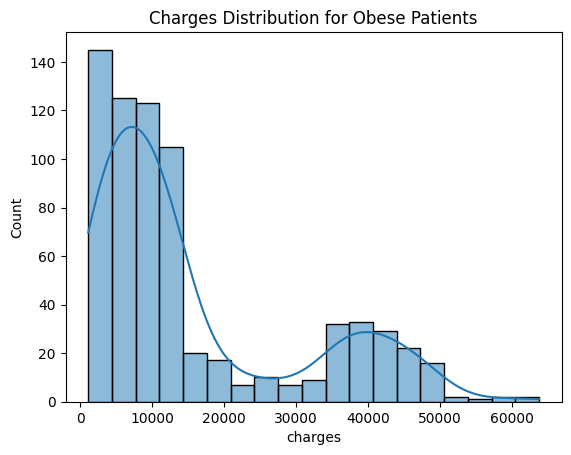

In [23]:
# Charges Distribution for obese patients(BMI >= 30)
sns.histplot(df[(df.bmi >= 30)]['charges'],kde=True)
plt.title('Charges Distribution for Obese Patients')
plt.show()

Patients with a BMI of 30 or higher tend to have higher medical charges on average.

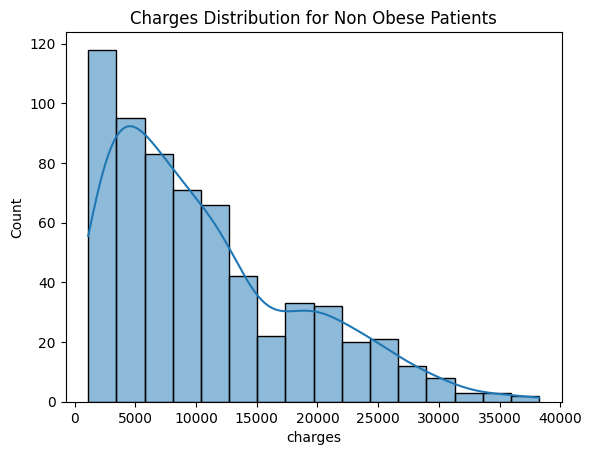

In [24]:
# Charges Distribution for non-obese patients(BMI < 30)
sns.histplot(df[(df.bmi < 30)]['charges'],kde=True)
plt.title('Charges Distribution for Non Obese Patients')
plt.show()

Therefore, patients with BMI less than 30 are spending less on medical treatment than those with BMI greater than 30.

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


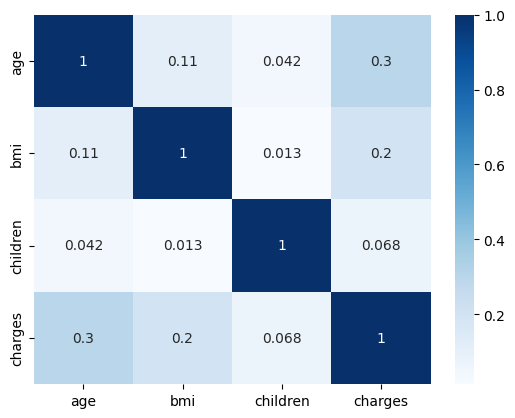

In [26]:
# Correlation Heatmap
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='Blues')
plt.show()

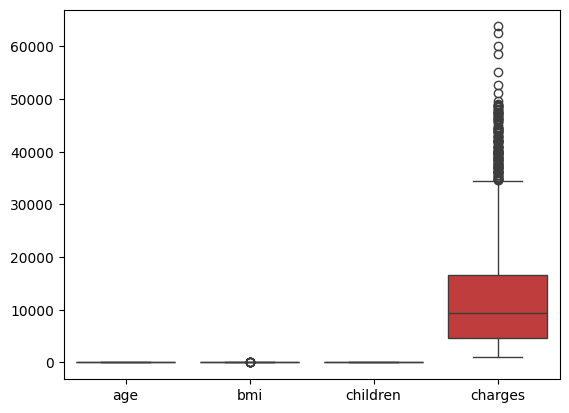

In [27]:
# Checking for Outliers
sns.boxplot(data=df)
plt.show()

### Data Preprocessing

#### Encoding categorical data

In [28]:
# Mapping categorical variables to numerical
df['sex'] = df['sex'].map({'male':1,'female':0})
df['smoker'] = df['smoker'].map({'yes':1,'no':0})
df['region'] = df['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [29]:
# Feature Separation
X = df.drop('charges',axis=1)
y = df.charges

In [30]:
# Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [31]:
X_train.shape

(1070, 6)

In [32]:
X_test.shape

(268, 6)

#### Feature Scaling

In [33]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Trainign and Evaluation

In [34]:
def evaluate_model(model):
    # Training model
    model.fit(X_train_scaled,y_train)
    print(f'Training score: {model.score(X_train_scaled,y_train)}')
    print('-----'*8)

    # Predictions
    print('Predictions on Test Data')
    y_pred = model.predict(X_test_scaled)
    print('R2 Score:', r2_score(y_test, y_pred))
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    
    # Kde Plot
    sns.kdeplot(y_test, label='Actual',color='b')
    sns.kdeplot(y_pred, label='Predicted',color='r')
    plt.title(f'Actual vs Fitted values for {type(model).__name__}')
    plt.legend()

#### Linear Regression

Training score: 0.7368306228430945
----------------------------------------
Predictions on Test Data
R2 Score: 0.799874714544996
MAE: 3930.3332739011394
MSE: 31845929.134159427
RMSE: 5643.2197488809015


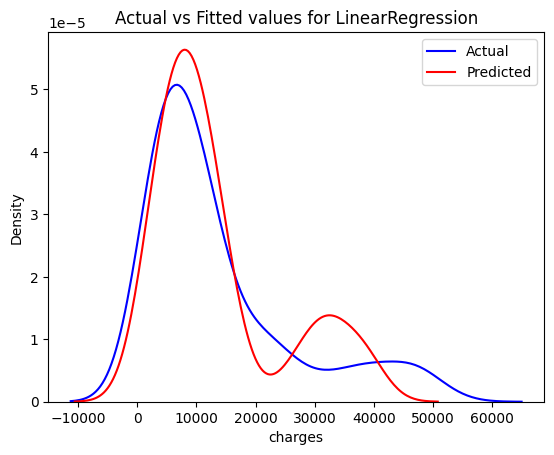

In [35]:
evaluate_model(LinearRegression())

#### KNN

Training score: 0.8486543127940716
----------------------------------------
Predictions on Test Data
R2 Score: 0.8291258527667482
MAE: 3372.46395016791
MSE: 27191196.6110527
RMSE: 5214.517869472948


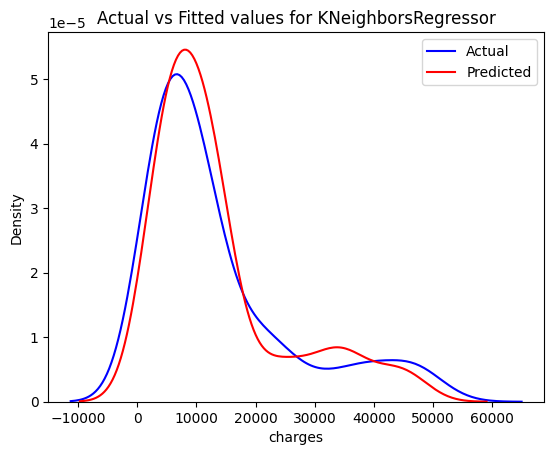

In [36]:
evaluate_model(KNeighborsRegressor())

#### Decision Tree

Training score: 0.9982963931606104
----------------------------------------
Predictions on Test Data
R2 Score: 0.6232945037606088
MAE: 3980.9649346604483
MSE: 59945131.423111945
RMSE: 7742.4241309238505


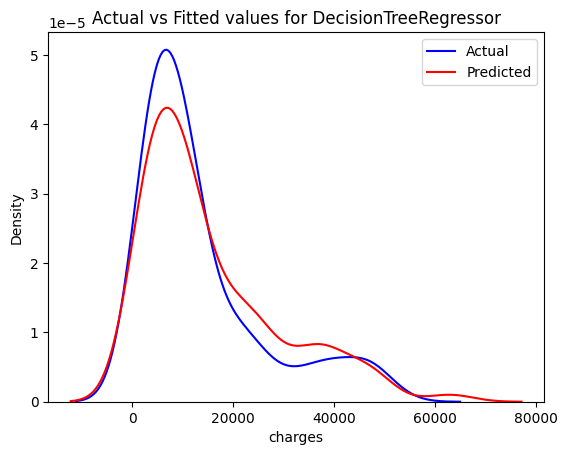

In [37]:
evaluate_model(DecisionTreeRegressor())

#### Random Forest

Training score: 0.9749154682059091
----------------------------------------
Predictions on Test Data
R2 Score: 0.878860310474003
MAE: 2645.872575585913
MSE: 19276954.229985885
RMSE: 4390.552838764827


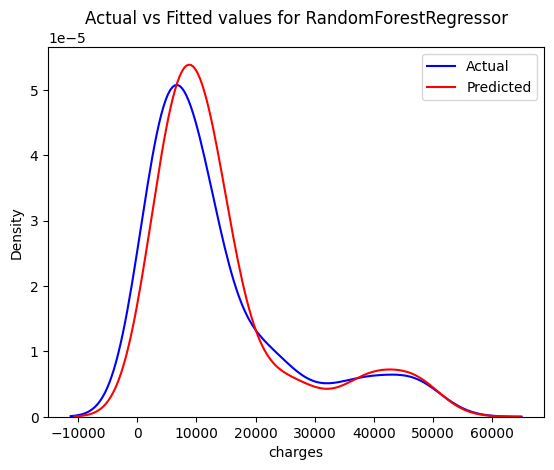

In [38]:
evaluate_model(RandomForestRegressor())

From the evaluation of the models, the Random Forest Regressor emerged as the best-performing model, achieving a high R² score of 87% and the lowest RMSE value. Therefore, it is the most suitable choice for accurately predicting medical expenses for patients.

Here the Random forest Regressor model showed signs of overfitting, as it achieved high accuracy on the training data but less on the test data. To address this, hyperparameter tuning was performing using GridSearchCV to optimize the model's parameters, reduce overfitting, and improve its generalization on unseen data.

In [39]:
# Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [3, 5, 7, None],      
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],    
    'max_features': ['sqrt', 'log2', None],  
}

In [40]:
# Define the model
rf_regressor = RandomForestRegressor()

# Define the GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best parameters and score
print("Best Parameters:", grid_search_rf.best_params_)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


In [41]:
# Predictions after tuning the model
pred = grid_search_rf.predict(X_test_scaled)
print(f'R2 Score: {r2_score(y_test,pred)}')

R2 Score: 0.9025563311040137


After hyperparameter tuning, the model's R² score increased to 90%, reflecting a noticeable improvement in its predictive performance.

### Feature Importance

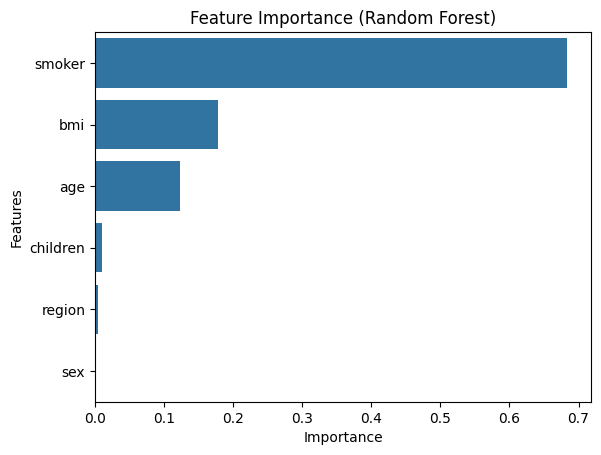

In [42]:
best_rf_model = grid_search_rf.best_estimator_
feature_df = pd.DataFrame({'Features': X_train.columns, 'Importance': best_rf_model.feature_importances_}).sort_values('Importance', ascending=False)

# Plot feature importance
sns.barplot(data=feature_df, x='Importance', y='Features')
plt.title('Feature Importance (Random Forest)')
plt.show()

From the above Feature Importance plot, it is clear that Smoking, BMI, and Age are the most important factors influencing a patient's medical expenses. Therefore, these factors should be prioritized when assessing healthcare costs and risk management.

### Saving the model

In [43]:
# Saving both the model and scaler
import joblib
joblib.dump((best_rf_model,scaler),'medical_insurance_predictor.pkl')

['medical_insurance_predictor.pkl']